<a href="https://colab.research.google.com/github/jinhangjiang/Reddit_SPY_Prediction/blob/main/scripts/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [11]:
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')
df = pd.read_csv("/content/Six_Month_Data.csv", parse_dates=['Date'], date_parser=dateparse)

# word count

In [3]:
count = df.Text.str.split().str.len()

In [4]:
(count.min(), count.mean(), count.max())

(1.0, 58.198770734013635, 2563.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


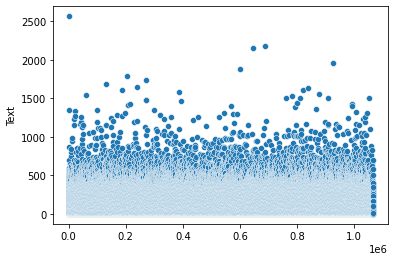

In [5]:
sns.scatterplot(count.index, count)

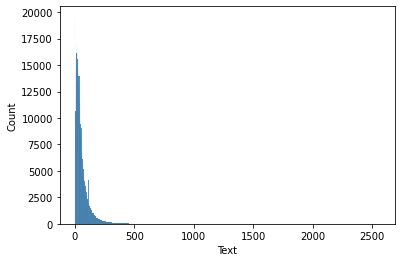

In [6]:
sns.histplot(count)

In [7]:
for i in [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
  print(f"The Number of Words for the {int(i*100)}th percentile is", count.quantile(i))

The Number of Words for the 10th percentile is 10.0
The Number of Words for the 25th percentile is 20.0
The Number of Words for the 50th percentile is 38.0
The Number of Words for the 75th percentile is 72.0
The Number of Words for the 90th percentile is 126.0
The Number of Words for the 95th percentile is 175.0
The Number of Words for the 99th percentile is 321.0


May 25, 2022

As of now, let's set the max_length to 175, which can capture the full text for 95% of the text.

# Vote Count

In [8]:
(df['Vote'].min(), df['Vote'].mean(), df['Vote'].max())

(-1355.0, 1.7736278929290314, 15821.0)

In [12]:
df[df['Vote']==15821].Text.tolist()

['I am a bank manager.   Tell someone. They 100% have access to your accounts and should not be working with peoples money. This is a huge breach of trust. This employee should be fired and black listed for this.']

In [18]:
df[df['Vote']==-1355].Text.tolist()

['Your wife should be asking for more information not you. It was her job. Why are you talking to these people so much?']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


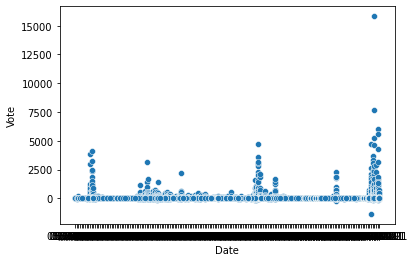

In [21]:
sns.scatterplot(df.Date, df['Vote'])

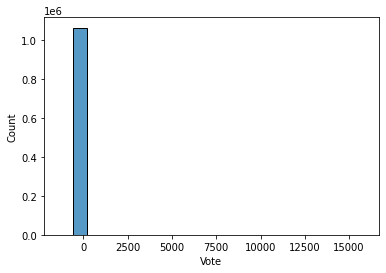

In [15]:
sns.histplot(df['Vote'])

In [16]:
for i in [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
  print(f"The Number of Words for the {int(i*100)}th percentile is", df['Vote'].quantile(i))

The Number of Words for the 10th percentile is 1.0
The Number of Words for the 25th percentile is 1.0
The Number of Words for the 50th percentile is 1.0
The Number of Words for the 75th percentile is 1.0
The Number of Words for the 90th percentile is 1.0
The Number of Words for the 95th percentile is 2.0
The Number of Words for the 99th percentile is 10.0


In [17]:
df['Vote'].value_counts()

 1.0       954051
 2.0        41953
 0.0        16741
 3.0        16674
 4.0         6768
            ...  
 392.0          1
 297.0          1
 483.0          1
 2350.0         1
-61.0           1
Name: Vote, Length: 633, dtype: int64

# Date

In [31]:
df.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1066134
unique                    184
top       2022-02-07 00:00:00
freq                     8393
first     2021-11-23 00:00:00
last      2022-05-25 00:00:00
Name: Date, dtype: object

In [32]:
df.groupby('Date').size().mean()

5794.20652173913

In [33]:
(df.Date.min(),df.Date.max())

(Timestamp('2021-11-23 00:00:00'), Timestamp('2022-05-25 00:00:00'))

# Slice Data for PoC1, 4 weeks

> Indented block



In [17]:
df['Weekday'] = df.Date.dt.dayofweek

In [21]:
df['Weekday_Str'] = df.Date.dt.strftime("%A")

In [29]:
df_poc1 = df[(df.Date>='2021-11-27')&(df.Date<='2021-12-26')]

In [30]:
df_poc1.Date.nunique()

30

In [31]:
df_poc1.to_csv("PoC1.csv", index=False)